Name  : Richard Edgina Virgo  
Batch : 006



---




To create an immersive and personalized gaming experience for customers, a gaming company wants to integrate emotion recognition technology into their games. Initially, they have tasked me, as a data engineer, with developing a deep learning model to identify customer emotions such as anger, disgust, fear, happiness, neutrality, sadness, and surprise from images. To achieve this objective, we will employ SMART analysis to define clear and actionable goals, develop a deep learning model for emotion identification, use accuracy as a metric to evaluate the model's performance, and utilize transfer learning to address limited data and improve the model's effectiveness. By following these steps, we aim to develop a robust emotion recognition system for an enhanced gaming experience.

----

### ***Import Libraries***
---

In [1]:
# Access folder
import os
import glob
import random

# Data loading
import numpy as np
import pandas as pd
import cv2

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Models
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, BatchNormalization, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras import regularizers
# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import warnings
from IPython.display import clear_output
import pdb
# Transfer learning
import tensorflow_hub as hub
warnings.filterwarnings('ignore')
import os

---
---

### ***Data Loading***

----

Due to the importance of validation data in deep learning, it is crucial to split the validation data from the training data.

In [2]:
pip install split-folders

Import drive from google colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Download data set from kaggle

In [7]:
! kaggle datasets download ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
emotion-detection-fer.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzip the data

In [8]:
! unzip emotion-detection-fer.zip

Archive:  emotion-detection-fer.zip
replace test/angry/im0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

----

### ***Validation Data***

----

Split the folders to make the validation data

In [9]:
import splitfolders
path = "/content/train"
print(os.listdir(path))

['sad', 'angry', 'happy', 'neutral', 'surprised', 'disgusted', 'fearful']


In [10]:
splitfolders.ratio(path,seed=1337, output="Val", ratio=(0.8, 0.2))

Copying files: 28709 files [00:11, 2468.95 files/s]


In [11]:
main_path= '/content/Val'
os.listdir(main_path)

['train', 'val']

In [12]:
# create variable for train, test, validation directory
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join('/content', 'test')
val_dir = os.path.join(main_path, 'val')
print(train_dir)
print(test_dir)
print(val_dir)

/content/Val/train
/content/test
/content/Val/val


In [13]:
# create variables train, test ,validation each for each class
#train

train_angry = len(os.listdir(os.path.join(train_dir, 'angry')))
train_disgusted = len(os.listdir(os.path.join(train_dir, 'disgusted')))
train_fearful = len(os.listdir(os.path.join(train_dir, 'fearful')))
train_happy = len(os.listdir(os.path.join(train_dir, 'happy')))
train_neutral = len(os.listdir(os.path.join(train_dir, 'neutral')))
train_sad = len(os.listdir(os.path.join(train_dir, 'sad')))
train_surprised = len(os.listdir(os.path.join(train_dir, 'surprised')))

#test
test_angry = len(os.listdir(os.path.join(test_dir, 'angry')))
test_disgusted = len(os.listdir(os.path.join(test_dir, 'disgusted')))
test_fearful = len(os.listdir(os.path.join(test_dir, 'fearful')))
test_happy = len(os.listdir(os.path.join(test_dir, 'happy')))
test_neutral = len(os.listdir(os.path.join(test_dir, 'neutral')))
test_sad = len(os.listdir(os.path.join(test_dir, 'sad')))
test_surprised = len(os.listdir(os.path.join(test_dir, 'surprised')))

#Val
val_angry = len(os.listdir(os.path.join(val_dir, 'angry')))
val_disgusted = len(os.listdir(os.path.join(val_dir, 'disgusted')))
val_fearful = len(os.listdir(os.path.join(val_dir, 'fearful')))
val_happy = len(os.listdir(os.path.join(val_dir, 'happy')))
val_neutral = len(os.listdir(os.path.join(val_dir, 'neutral')))
val_sad = len(os.listdir(os.path.join(val_dir, 'sad')))
val_surprised = len(os.listdir(os.path.join(val_dir, 'surprised')))

In [14]:
# Create a variable from filepaths

#train
train_angry = glob.glob(train_dir + '/angry/*.png')
train_disgusted = glob.glob(train_dir + '/disgusted/*.png')
train_fearful = glob.glob(train_dir + '/fearful/*.png')
train_happy = glob.glob(train_dir + '/happy/*.png')
train_neutral = glob.glob(train_dir + '/neutral/*.png')
train_sad = glob.glob(train_dir + '/sad/*.png')
train_surprised = glob.glob(train_dir + '/surprised/*.png')
# test
test_angry = glob.glob(test_dir + '/angry/*.png')
test_disgusted = glob.glob(test_dir + '/disgusted/*.png')
test_fearful = glob.glob(test_dir + '/fearful/*.png')
test_happy = glob.glob(test_dir + '/happy/*.png')
test_neutral = glob.glob(test_dir + '/neutral/*.png')
test_sad = glob.glob(test_dir + '/sad/*.png')
test_surprised = glob.glob(test_dir + '/surprised/*.png')
# Val
val_angry = glob.glob(val_dir + '/angry/*.png')
val_disgusted = glob.glob(val_dir + '/disgusted/*.png')
val_fearful = glob.glob(val_dir + '/fearful/*.png')
val_happy = glob.glob(val_dir + '/happy/*.png')
val_neutral = glob.glob(val_dir + '/neutral/*.png')
val_sad = glob.glob(val_dir + '/sad/*.png')
val_surprised = glob.glob(val_dir + '/surprised/*.png')

Here is train, test, and validaton data frame

In [15]:
# Creating dataset train, test, validation

def create_dataframe(list_of_images):
  data=[]
  for image in list_of_images:
    data.append((image, image.split('/')[-2]))

  return pd.DataFrame(data, columns= ['images', 'label'])
# Train data frame
train_df = create_dataframe(train_angry + train_disgusted + train_fearful + train_happy + train_neutral + train_sad + train_surprised)
train_df = train_df.sample(frac=1, random_state=7).reset_index(drop=True)
# Test data frame
test_df = create_dataframe(test_angry + test_disgusted + test_fearful + test_happy + test_neutral + test_sad + test_surprised)
test_df = test_df.sample(frac=1, random_state=7).reset_index(drop=True)
# Validation data frame
val_df = create_dataframe(val_angry + val_disgusted + val_fearful + val_happy + val_neutral + val_sad + val_surprised)
val_df = val_df.sample(frac=1, random_state=7).reset_index(drop=True)

<vspace>

---
---

### ***About the Data***

---

The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset. Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).

----
----

<vspace>

### ***EDA***

-----

Here is the explanation about the images data. First make function to visualize each class

In [16]:
#function to visualize each class

def visualize_samples_by_label(df, label, num_samples=20):
    samples = df[df['label'] == label]['images'].iloc[:num_samples].tolist()
    num_cols = min(num_samples, 5)
    num_rows = (num_samples - 1) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))
    count = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if count < len(samples):
                sample = samples[count]
                img = cv2.imread(sample)
                ax = axes[i, j]
                # ax.set_title(sample.split('/')[-1].split('\')[-1])
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                ax.axis('off')
                count += 1
    plt.tight_layout()
    plt.show()


Here is explanation for each class

### ***Angry***

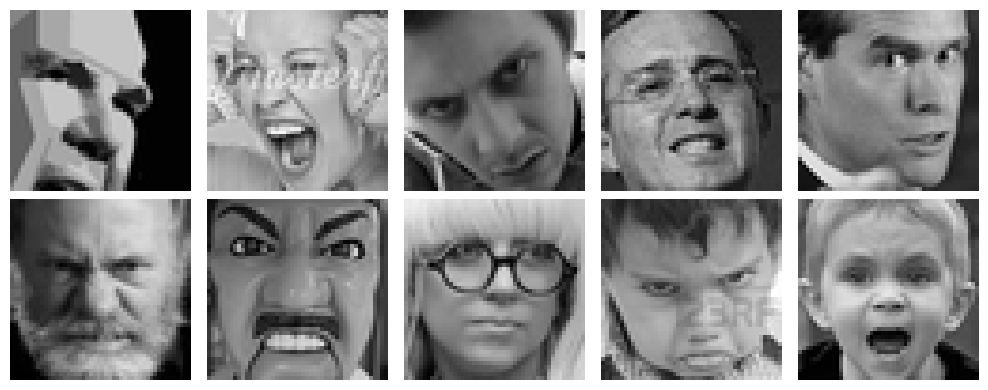

In [17]:
# visualize 'angry' class
visualize_samples_by_label(train_df, 'angry', num_samples=10)

This is a 48 x 48 pixel gray scale of angry images that contained the people who display a clenched jaw, intense eye contact, furrowed brows, and reddened skin.

### ***Disgusted***

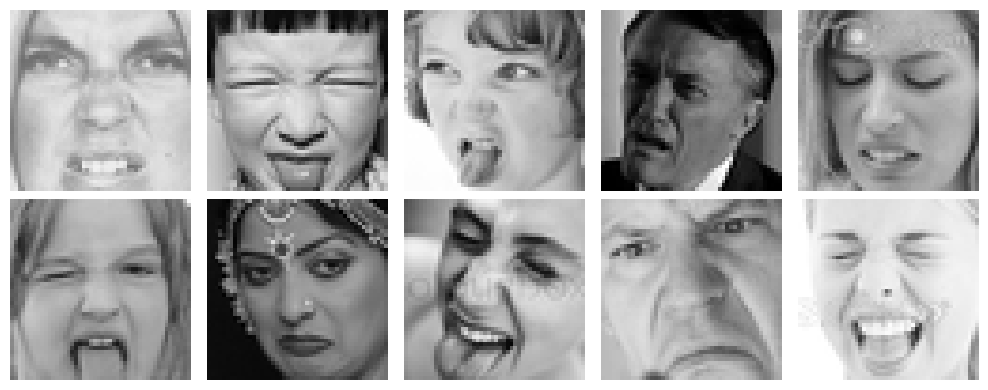

In [18]:
# Visualize 'disgusted' class
visualize_samples_by_label(train_df, 'disgusted', num_samples=10)

This is a 48 x 48 pixel gray scale of disgusted images that contained the people who display the lips curling into a snarling frown, the nostrils flaring, the cheeks pushing up to squinting lower lids and a furrowed brow.

### ***Fearful***

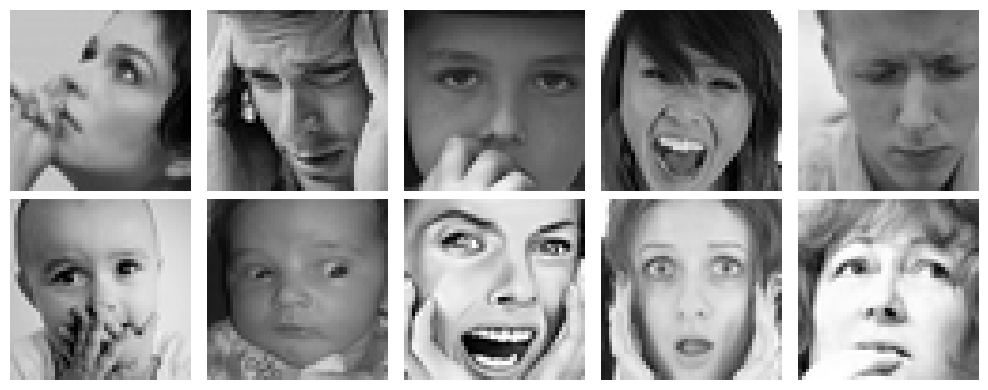

In [19]:
# Visualize 'fearful' class
visualize_samples_by_label(train_df, 'fearful', num_samples=10)

This is a 48 x 48 pixel gray scale of fearful images that contained the people who display the wide opened eyes and flared nostrils

### ***Happy***

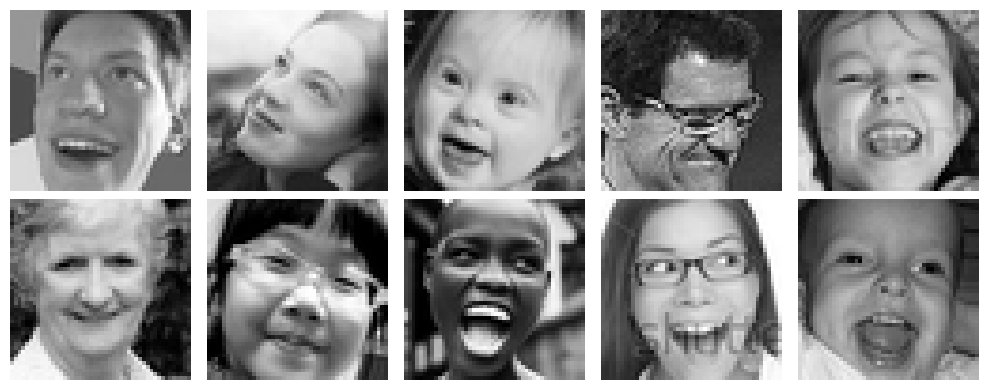

In [20]:
# Visualize 'happy' class
visualize_samples_by_label(train_df, 'happy', num_samples=10)

This is a 48 x 48 pixel gray scale of happy images that contained the people who display a raised eyebrows, dimple cheeks, raised cheeks, and open mouth

### ***Neutral***

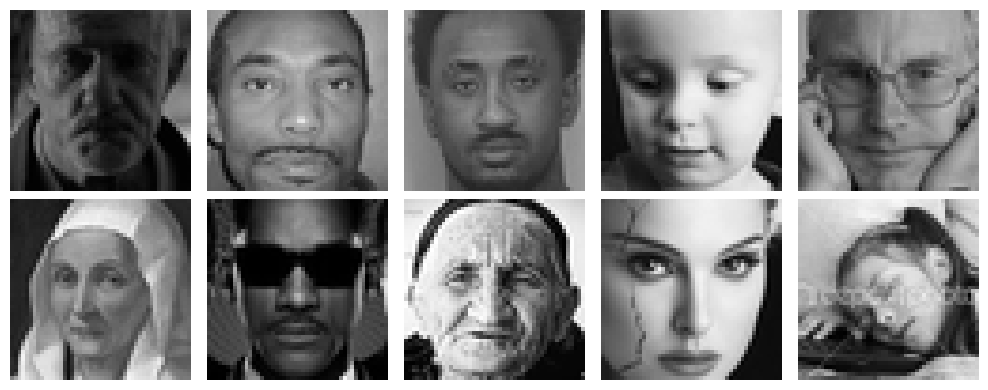

In [21]:
# Visualize 'neutral' class
visualize_samples_by_label(train_df, 'neutral', num_samples=10)

This is a 48 x 48 pixel gray scale of neutral images that contained the people who express no particular emotion

### ***Sad***

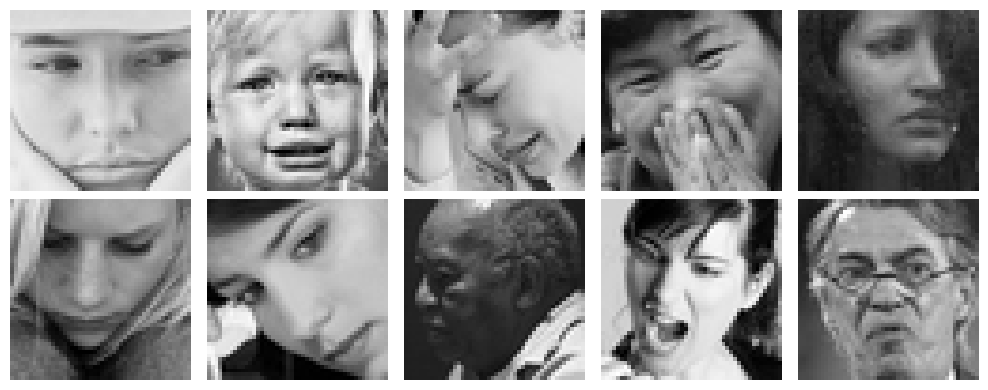

In [22]:
# Visualize 'sad' class
visualize_samples_by_label(train_df, 'sad', num_samples=10)

This is a 48 x 48 pixel gray scale of sad images that contained the people who display owering the corners of the mouth, allowing the eyebrows to descend, and drooping the eyelids

### ***Surprised***

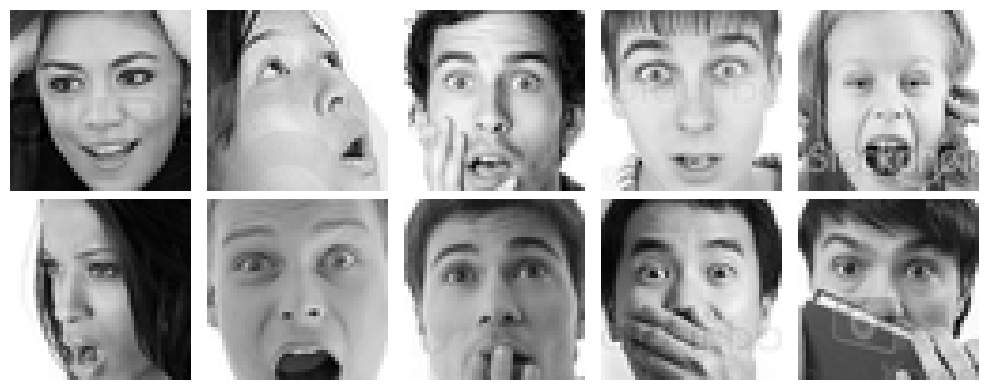

In [23]:
# Visualize 'surprised' class
visualize_samples_by_label(train_df, 'surprised', num_samples=10)

This is a 48 x 48 pixel gray scale of surprised images that contained the people who display a eyebrow raised, but not drawn together, upper eyelids raised, lower eyelids neutral, and jaw dropped down.

----
----

<vspace>

### ***EDA Analysis***

----

From Images that display 7 emotions, i can see some resemblance between happy and surprised, sad and fearful. From that instances, i can predict that the model is having a hard time to differentiate between each class

---
---

Next let's train data using sequential API

---
---

## ***ANN Training (Sequential API)***

---

### ***Model Definition***

This deep learning model is used using sequential API. This model is used due to simplicity and easy to used with only consist of stacked layer. The metrics that i used for this model is accuracy. Accuracy is used because i want to calculate how good or accurate the model in identifying the emotion

----

<vspace>

### ***Augmentation***

-----

Augmentation is used to improve accuracy of the prediction, reduced data dependancy, and make model more fit. Data augmentation is artificially increasing the training set by modify and making minor changes to the dataset or using deep learning to generate new data points. Minor changes like rotating, shifting, zooming, shearing, and flipping.

In [24]:
# Define setting picture

img_height= 110 # set hight image
img_width= 110  # set width image
seed=7
batch_size= 32
input=[img_height,img_width,3]

In [25]:
# Augmentation Data

train_datagen = ImageDataGenerator(
              rescale= 1./255,        # This line scales down the pixel values of the images to the range of 0 to 1 by dividing them by 255.
              rotation_range= 0.1,    # Rotation is applied to the images within a range of 0.1 radians.
              width_shift_range= 0.2, # horizontal shifts can be applied to the images within a range of 20% of the total width.
              shear_range= 0.2,       # Shear transformations can be applied to the images within a range of 20%.
              zoom_range= 0.2,        # Zooming can be applied to the images within a range of 20%. It can zoom in or out on the objects within the images.
              horizontal_flip= True,  # Horizontal flips can be applied to the images with a 50% chance. It horizontally mirrors the images.
              vertical_flip = True    # Vertical flips can be applied to the images with a 50% chance. It vertically mirrors the images.
              )

In [26]:
# for validation data only use rescale
val_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
# for test data only use rescale
test_datagen = ImageDataGenerator(rescale=1./255)


Let's train our model

----

### ***Model Training***

---

Here is our train, validation, and test data

In [28]:
# train data
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=seed)

# validation data
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=seed)

# test data
ds_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=seed)

Found 22965 validated image filenames belonging to 7 classes.
Found 5744 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


Callbacks is used to customize the behaviour of model during training, evaluation, and inference. EarlyStopping is used to stop the training when a monitored metric has stopped improving. ModelCheckPoint is used to save model or weight at some interval.

In [29]:
# create callbacks

callbacks = [
    EarlyStopping(monitor='val_loss', patience = 3),
    ModelCheckpoint('model.hdf5', monitor='val_loss', save_best_only=True)
]

In [30]:
# Sequential Model
model= Sequential()

#Layer Conv 1,
model.add(Conv2D(filters=16, kernel_size=3, activation='relu',
                       input_shape=input))
model.add(MaxPooling2D(pool_size=2, strides=2))

#Layer Conv 2
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding= 'same'))
model.add(MaxPooling2D(pool_size=2, strides=2))

#Flatten
model.add(Flatten())

#Hidden Layer
model.add(Dense(units=32, activation='relu'))

#Output Layer
model.add(Dense(units=15, activation='softmax'))

#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 54, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 32)                7

Compile the model

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# Training Based Model
%%time
history= model.fit(ds_train, batch_size= batch_size,
                           epochs= 20, validation_data= ds_val,
                           callbacks= callbacks)

Epoch 1/20
718/718 [==============================] - 99s 132ms/step - loss: 1.8180 - accuracy: 0.2519 - val_loss: 1.7611 - val_accuracy: 0.2831
Epoch 2/20
718/718 [==============================] - 97s 136ms/step - loss: 1.7529 - accuracy: 0.2859 - val_loss: 1.7357 - val_accuracy: 0.3010
Epoch 3/20
718/718 [==============================] - 94s 131ms/step - loss: 1.7219 - accuracy: 0.3057 - val_loss: 1.7487 - val_accuracy: 0.2871
Epoch 4/20
718/718 [==============================] - 91s 127ms/step - loss: 1.6878 - accuracy: 0.3275 - val_loss: 1.6565 - val_accuracy: 0.3487
Epoch 5/20
718/718 [==============================] - 91s 126ms/step - loss: 1.6579 - accuracy: 0.3406 - val_loss: 1.6061 - val_accuracy: 0.3790
Epoch 6/20
718/718 [==============================] - 95s 133ms/step - loss: 1.6304 - accuracy: 0.3605 - val_loss: 1.5939 - val_accuracy: 0.3672
Epoch 7/20
718/718 [==============================] - 91s 127ms/step - loss: 1.6148 - accuracy: 0.3645 - val_loss: 1.5716 - val_ac

Here is our loss and accuracy function

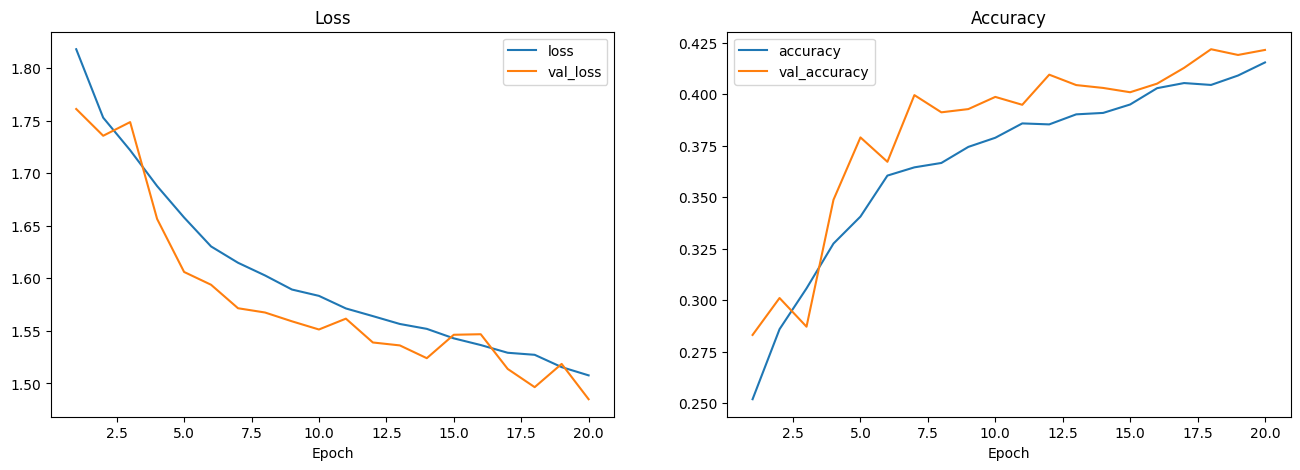

In [33]:
epoch=20
# Visualize loss and accuracy graph
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

Loss graph above indicate that there is a decrease exponentially in loss and validation loss. It indicates that the more epochs continue, the less the loss it indicates that model become more efficient. Accuracy graph above indicate that there is a increase exponentially in accuracy and validation accuracy, it means that the model more often correctly predict the outcome.

---

<vspace>

### ***Model Evaluation***

----

From the model that have been built, let's test it on test data set

In [34]:
# Result Loss and Accuracy
test_results = model.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 1.4778
Test Accuracy : 0.4224


The test loss is 1.4615 and test accuracy is 0.4368. It indicates that there is significant differences between accuracy, val accuray, and test accuracy. Next let's predict test data

In [35]:
# Predict test data
prediction = model.predict(ds_test)

225/225 [==============================] - 4s 18ms/step


In [36]:
y_pred = np.argmax(model.predict(ds_test), axis=-1)
y_pred

225/225 [==============================] - 4s 17ms/step


array([6, 3, 4, ..., 3, 4, 4])

Here are the class for each image class

In [37]:
# create class name
class_names = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

In [38]:
y_pred1=np.array(class_names)[y_pred]

In [39]:
# create dataframe to save prediction
pred_result_pred = pd.DataFrame(y_pred1, columns=['y_pred'])

In [40]:
# reset index
test_df_reset = test_df.reset_index(drop=True)

Here is the data frame results 

In [41]:
# concat label and y_pred
result_model_pred1 = pd.concat([test_df_reset, pred_result_pred], axis=1)
result_model_pred1 = result_model_pred1.reset_index(drop=True)
result_model_pred1[['label', 'y_pred']]

,label,y_pred
0,surprised,surprised
1,fearful,happy
2,fearful,neutral
3,happy,surprised
4,neutral,happy
...,...,...
7173,sad,sad
7174,happy,happy
7175,angry,happy
7176,fearful,neutral


The data frame above indicates a discrepancy between the labels and the predictions. It also highlights errors in predicting the fearful emotion. This suggests that the fearful emotion shares similar characteristics with other emotions.

Here is the classification report

In [42]:
print('Classification report test : \n',classification_report(result_model_pred1['label'], result_model_pred1['y_pred']))

Classification report test : 
               precision    recall  f1-score   support

       angry       0.34      0.22      0.27       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.28      0.15      0.19      1024
       happy       0.46      0.79      0.58      1774
     neutral       0.41      0.34      0.37      1233
         sad       0.38      0.25      0.30      1247
   surprised       0.48      0.67      0.56       831

    accuracy                           0.42      7178
   macro avg       0.34      0.34      0.32      7178
weighted avg       0.39      0.42      0.39      7178



The classification report indicates that the highest F1 score is for the "happy" emotion, meaning the model is better at identifying happy emotions than other emotions due to big number of data. Conversely, the "disgusted" class has the lowest F1 score and the fewest samples, indicating that the model struggles to identify emotions with a low number of samples. This model have 42% accuracy, it means that model have the ability to classify the class 42 % of the time.

Here is confusion matrix

<Axes: >

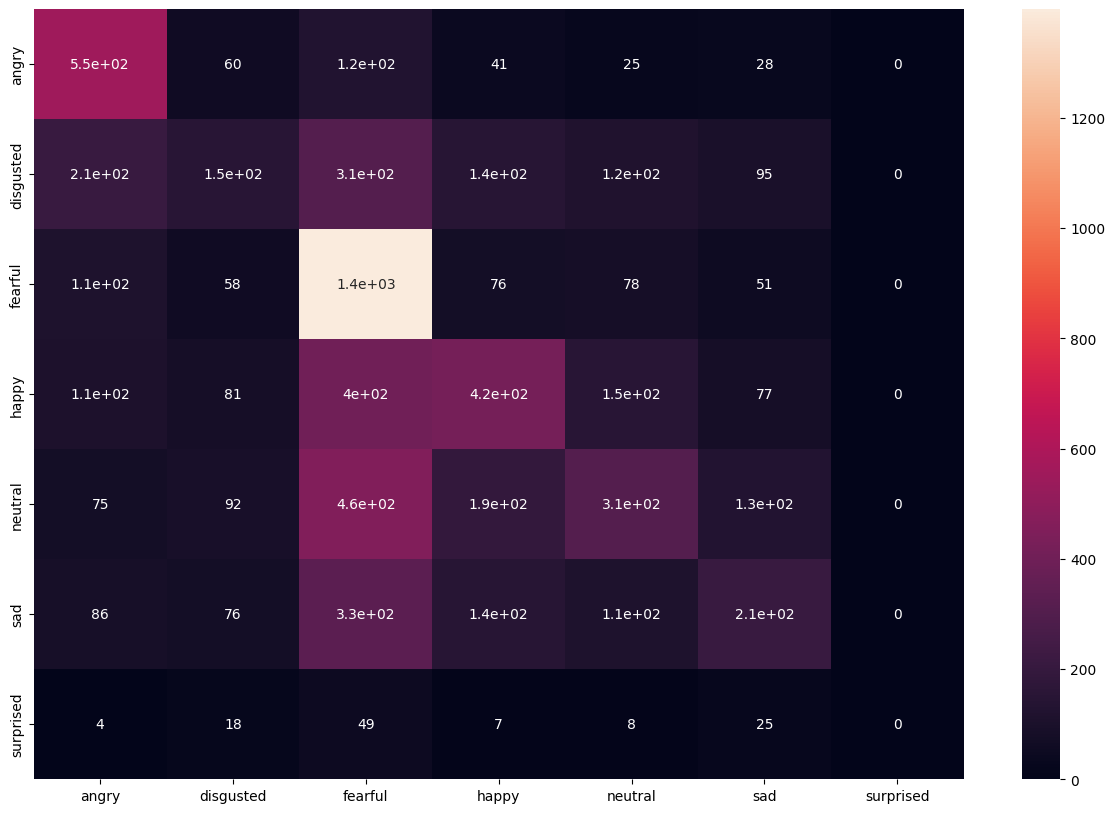

In [43]:
# Display Confusion Matrix

np.set_printoptions(suppress=True)

plt.figure(figsize=(15, 10))
model_confussionmatrix = confusion_matrix(result_model_pred1['label'], result_model_pred1['y_pred'], labels=result_model_pred1['label'].unique())
sns.heatmap(model_confussionmatrix, annot=True , xticklabels=class_names, yticklabels=class_names)

The highest number of misclassifications is between the neutral and fearful emotions, with 460 instances. This indicates that the model struggles to differentiate between neutral and fearful emotions. The next highest misclassification is between happy and fearful emotions. This suggests that the fearful emotion shares similar characteristics with other emotions, making it difficult for the model to distinguish it accurately.

---
---

### ***ANN Improvement***

In [44]:
# Function for transfer learning
def feature_extractor(inputs):
    feature_extractor = tf.keras.applications.DenseNet169(input_shape=(img_height,img_width, 3),
                                               include_top=False,
                                               weights="imagenet")(inputs)

    return feature_extractor

# Function for in
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Dense(256, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
    x = tf.keras.layers.Dropout(0.5) (x)
    x = tf.keras.layers.Dense(units=7, activation="softmax", name="classification")(x)

    return x

# Function for feature extractor
def final_model(inputs):
    densenet_feature_extractor = feature_extractor(inputs)
    classification_output = classifier(densenet_feature_extractor)

    return classification_output

# Function to compile model
def define_compile_model():

    inputs = tf.keras.layers.Input(shape=(img_height ,img_width,3))
    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs = classification_output)

    model.compile(optimizer=tf.keras.optimizers.SGD(0.05),
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])

    return model

Apply the model function 

In [45]:
model = define_compile_model()
clear_output()
# Feezing the feature extraction layers
model.layers[1].trainable = True

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 densenet169 (Functional)    (None, 3, 3, 1664)        12642880  
                                                                 
 global_average_pooling2d (  (None, 1664)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 256)               426240    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1024)              263168    
                                                             

Total parameter is 13860679 with 13702279 trainable params and 158400 non trainable params

In [46]:
# Training Based Model
%%time
history2= model.fit(ds_train, batch_size= batch_size,
                           epochs= 50, validation_data= ds_val,
                           callbacks= callbacks)

Epoch 1/50
718/718 [==============================] - 227s 229ms/step - loss: 9.7859 - accuracy: 0.3576 - val_loss: 5.1427 - val_accuracy: 0.4502
Epoch 2/50
718/718 [==============================] - 152s 211ms/step - loss: 3.3357 - accuracy: 0.4870 - val_loss: 2.1718 - val_accuracy: 0.5263
Epoch 3/50
718/718 [==============================] - 154s 214ms/step - loss: 1.7718 - accuracy: 0.5317 - val_loss: 1.4574 - val_accuracy: 0.5475
Epoch 4/50
718/718 [==============================] - 152s 212ms/step - loss: 1.3725 - accuracy: 0.5566 - val_loss: 1.2388 - val_accuracy: 0.5836
Epoch 5/50
718/718 [==============================] - 154s 214ms/step - loss: 1.2446 - accuracy: 0.5779 - val_loss: 1.2122 - val_accuracy: 0.5742
Epoch 6/50
718/718 [==============================] - 157s 218ms/step - loss: 1.1933 - accuracy: 0.5913 - val_loss: 1.1554 - val_accuracy: 0.5909
Epoch 7/50
718/718 [==============================] - 151s 210ms/step - loss: 1.1627 - accuracy: 0.6024 - val_loss: 1.1885 -

In [47]:
model.save('model3.h5')

Let's visualize loss and accuracy graph

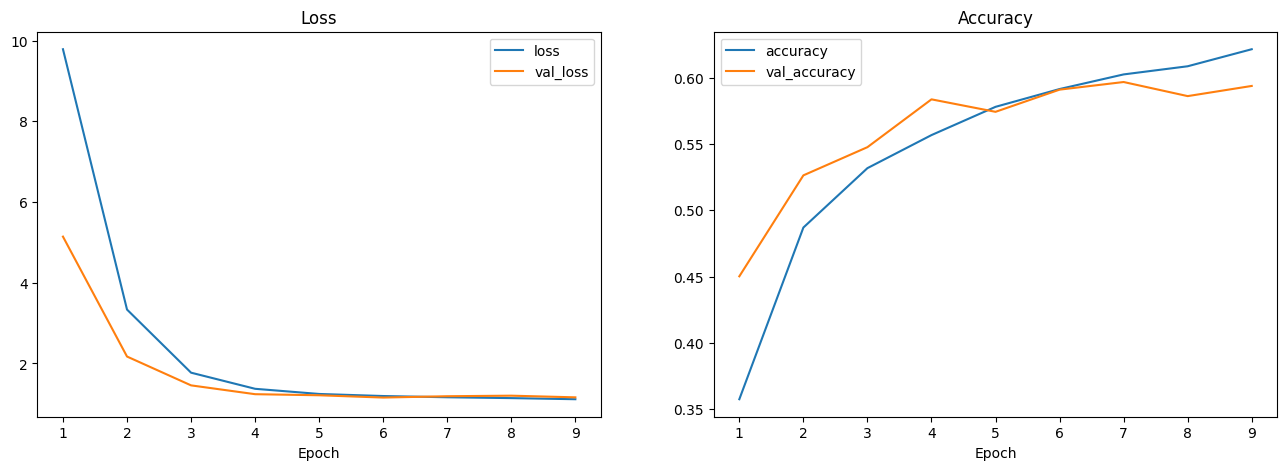

In [48]:
epoch=9
# Visualize loss and accuracy graph
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

Loss graph above indicate that there is a decrease exponentially in loss and validation loss. It indicates that the more epochs continue, the less the loss it indicates that model become more efficient. Accuracy graph above indicate that there is a increase exponentially in accuracy and validation accuracy, it means that the model more often correctly predict the outcome.

In [49]:
# Result Loss and Accuracy
test_results = model.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 1.1880
Test Accuracy : 0.5861


In [50]:
# Predict test data
prediction = model.predict(ds_test)

225/225 [==============================] - 12s 43ms/step


In [51]:
y_pred = np.argmax(model.predict(ds_test), axis=-1)
y_pred

225/225 [==============================] - 9s 38ms/step


array([6, 4, 2, ..., 0, 2, 2])

In [52]:
y_pred2=np.array(class_names)[y_pred]

In [53]:
# create dataframe to save prediction
pred_result_pred = pd.DataFrame(y_pred2, columns=['y_pred'])

In [54]:
# concat label and y_pred
result_model_pred2 = pd.concat([test_df_reset, pred_result_pred], axis=1)
result_model_pred2 = result_model_pred2.reset_index(drop=True)
result_model_pred2[['label', 'y_pred']]

,label,y_pred
0,surprised,surprised
1,fearful,neutral
2,fearful,fearful
3,happy,happy
4,neutral,angry
...,...,...
7173,sad,sad
7174,happy,happy
7175,angry,angry
7176,fearful,fearful


The data frame above indicates a discrepancy between the labels and the predictions. Like before improve model, it also highlights errors in predicting the fearful emotion.

In [55]:
print('Classification report test : \n',classification_report(result_model_pred2['label'], result_model_pred2['y_pred']))

Classification report test : 
               precision    recall  f1-score   support

       angry       0.48      0.57      0.52       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.38      0.39      0.38      1024
       happy       0.89      0.76      0.82      1774
     neutral       0.52      0.61      0.56      1233
         sad       0.48      0.54      0.51      1247
   surprised       0.77      0.59      0.67       831

    accuracy                           0.59      7178
   macro avg       0.50      0.49      0.49      7178
weighted avg       0.60      0.59      0.59      7178



The classification report indicates that the highest F1 score is for the "happy" emotion, meaning the model is better at identifying happy emotions than other emotions due to big number of data. Conversely, the "disgusted" class has the lowest F1 score and the fewest samples, indicating that the model struggles to identify emotions with a low number of samples. This model have 59% accuracy, it means that model have the ability to classify the class 59 % of the time.

<Axes: >

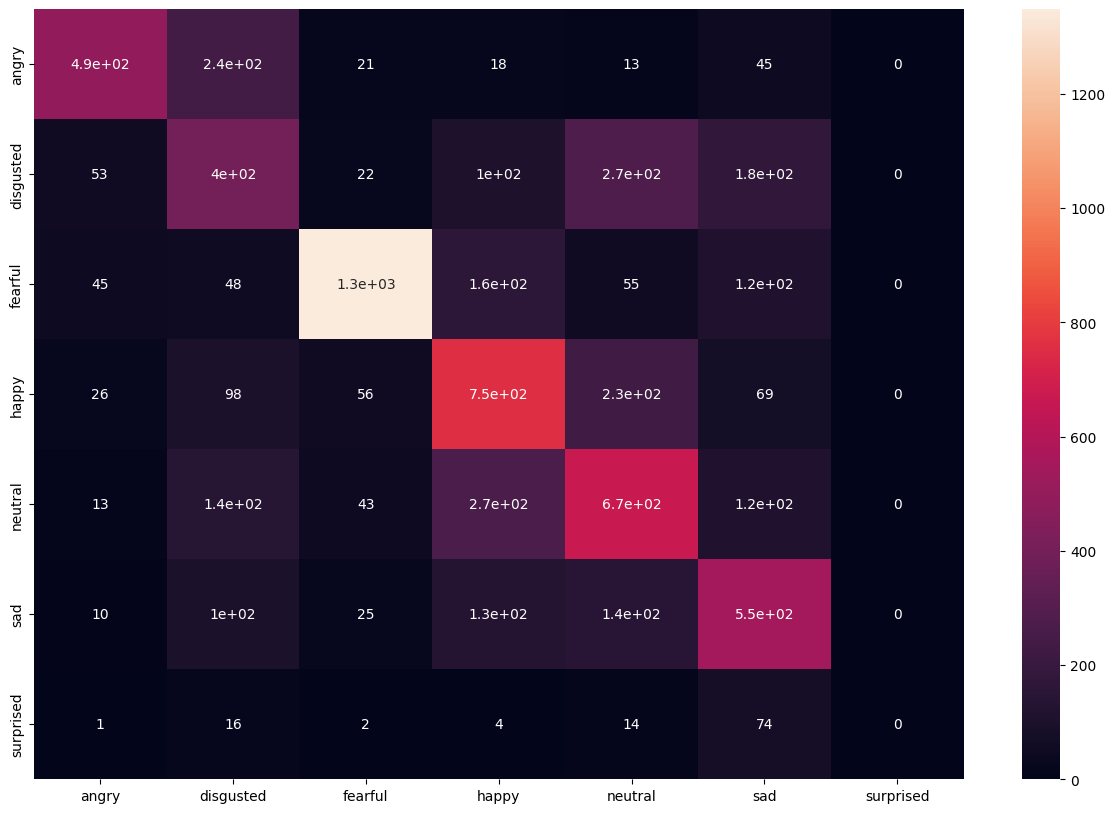

In [56]:
# Display Confusion Matrix

np.set_printoptions(suppress=True)

plt.figure(figsize=(15, 10))
model_confussionmatrix = confusion_matrix(result_model_pred2['label'], result_model_pred2['y_pred'], labels=result_model_pred2['label'].unique())
sns.heatmap(model_confussionmatrix, annot=True , xticklabels=class_names, yticklabels=class_names)

The highest number of misclassifications is between the neutral and disgusted emotions, with 270 instances. This indicates that the model struggles to differentiate between neutral and disgusted emotions. The next highest misclassification is between neutral and happy emotions. This suggests that the neutral emotion shares similar characteristics with other emotions, making it difficult for the model to distinguish it accurately.

There is an improvement in model performance before and after using transfer learning. The accuracy score increased from 42% to 59%. Additionally, there was a decrease in both loss and validation loss after applying transfer learning. This indicates that the model performs better after transfer learning.

---
---

<vspace>

### ***Summary and Recommendation***

----

This model was designed to identify emotions based on images and will be used in emotion recognition to enhance the gaming experience. Analysis shows that the model remains weak in classifying emotions, even after improvements. The company still needs to enhance the model for better emotion recognition. As a recommendation, the data can be balanced and augmented to improve performance for underrepresented classes.

----
----